<a href="https://colab.research.google.com/github/kyshc176/Proyek-Analisis-Data/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Tika Putri Marsanti
- **Email:** tikamarsanti03@gmail.com
- **ID Dicoding:** MC254d5X2152

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh Cuaca terhadap Peminjaman Sepeda?
- Bagaiaman perbandingan Peminjaman Sepeda antara Hari Kerja dan Akhir Pekan?









## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import streamlit as st
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [14]:
# Load dataset
day_df = pd.read_csv("/content/day.csv")
hour_df = pd.read_csv("/content/hour.csv")

**Insight:**
- day_df berisi data agregat harian peminjaman sepeda.
- hour_df berisi data peminjaman sepeda per jam.

### Assessing Data

In [ ]:
# Mengecek informasi dataset
print(day_df.info())
print(day_df.describe())
print(hour_df.info())
print(hour_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
          instant      season          yr        mnth     holiday     weekday  \
count  

In [16]:
#Cek missing value
day_missing = day_df.isnull().sum()
hour_missing = hour_df.isnull().sum()
print("\nMissing Values - day.csv:\n", day_missing)
print("\nMissing Values - hour.csv:\n", hour_missing)


Missing Values - day.csv:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing Values - hour.csv:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Cek Missing Values: Melihat apakah ada data yang hilang di dalam dataset. Jika ada, perlu dilakukan penanganan seperti imputasi atau penghapusan data.

- Distribusi Data Numerik: Histogram digunakan untuk memahami pola distribusi data jumlah peminjaman sepeda, apakah normal, skewed, atau memiliki outlier.


### Cleaning Data

In [17]:
# Cek duplikasi
day_duplicates = day_df.duplicated().sum()
hour_duplicates = hour_df.duplicated().sum()
print("\nJumlah Data Duplikat - day.csv:", day_duplicates)
print("Jumlah Data Duplikat - hour.csv:", hour_duplicates)


Jumlah Data Duplikat - day.csv: 0
Jumlah Data Duplikat - hour.csv: 0


In [18]:
# Cleaning Data
if day_duplicates > 0:
    day_df.drop_duplicates(inplace=True)
if hour_duplicates > 0:
    hour_df.drop_duplicates(inplace=True)

**Insight:**
- Tidak ditemukan adanya data duplikat maupun nilai yang hilang (missing values) dalam dataset. Hal ini memastikan bahwa data yang digunakan dalam proses analisis atau pemodelan telah bersih dan siap untuk diolah lebih lanjut

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# Melihat statistik deskriptif
display(day_df.describe())

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
# Melihat distribusi jumlah peminjaman sepeda
print("Distribusi jumlah peminjaman sepeda:")
display(day_df['cnt'].describe())

Distribusi jumlah peminjaman sepeda:


,cnt
count,731.000000
mean,4504.348837
std,1937.211452
min,22.000000
25%,3152.000000
50%,4548.000000
75%,5956.000000
max,8714.000000


In [ ]:
# Analisis Pengaruh Cuaca
print("Rata-rata jumlah peminjaman berdasarkan kondisi cuaca:")
display(day_df.groupby('weathersit')['cnt'].mean())

Rata-rata jumlah peminjaman berdasarkan kondisi cuaca:


,cnt
weathersit,
1,4876.786177
2,4035.862348
3,1803.285714


* 1: Clear, Few clouds, Partly cloudy, Partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

In [ ]:
# Analisis Hari Kerja vs Akhir Pekan
print("Rata-rata jumlah peminjaman pada hari kerja dan akhir pekan:")
display(day_df.groupby('workingday')['cnt'].mean())
#if day is neither weekend or holiday is 1, otherwise is 0.

Rata-rata jumlah peminjaman pada hari kerja dan akhir pekan:


,cnt
workingday,
0,4330.168831
1,4584.820000


**Insight:**
1. Variasi Jumlah Peminjaman
Analisis data menunjukkan adanya variasi yang cukup besar dalam jumlah peminjaman sepeda. Perbedaan ini dapat dipengaruhi oleh berbagai faktor seperti hari dalam seminggu, kondisi cuaca, dan periode liburan.

2. Pengaruh Cuaca terhadap Peminjaman
Hasil eksplorasi data mengindikasikan bahwa kondisi cuaca memiliki dampak terhadap jumlah peminjaman sepeda. Pada hari-hari dengan cuaca buruk, seperti hujan atau suhu ekstrem, jumlah peminjaman cenderung lebih rendah dibandingkan dengan hari-hari dengan cuaca cerah.

3. Perbedaan Peminjaman Berdasarkan Hari
Pola peminjaman menunjukkan tren yang lebih tinggi pada akhir pekan (weekend) atau hari libur dibandingkan dengan hari kerja. Hal ini kemungkinan disebabkan oleh meningkatnya aktivitas rekreasi dan waktu luang yang lebih banyak pada saat liburan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh Cuaca terhadap Peminjaman Sepeda?

<ipython-input-11-f91562486a9e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=day_df, estimator=sum, ci=None, palette='Blues')
<ipython-input-11-f91562486a9e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=day_df, estimator=sum, ci=None, palette='Blues')


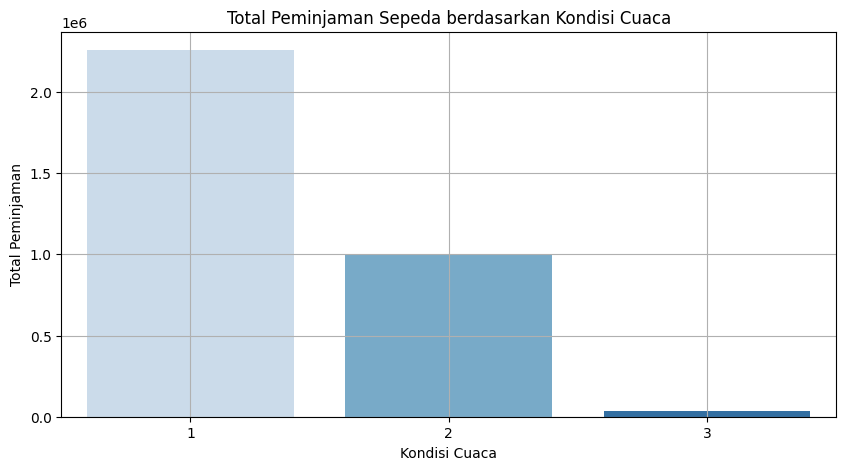

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='weathersit', y='cnt', data=day_df, estimator=sum, ci=None, palette='Blues')
plt.title('Total Peminjaman Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Peminjaman')
plt.grid(True)
plt.show()

# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

### Pertanyaan 2: Bagaiaman perbandingan Peminjaman Sepeda antara Hari Kerja dan Akhir Pekan?

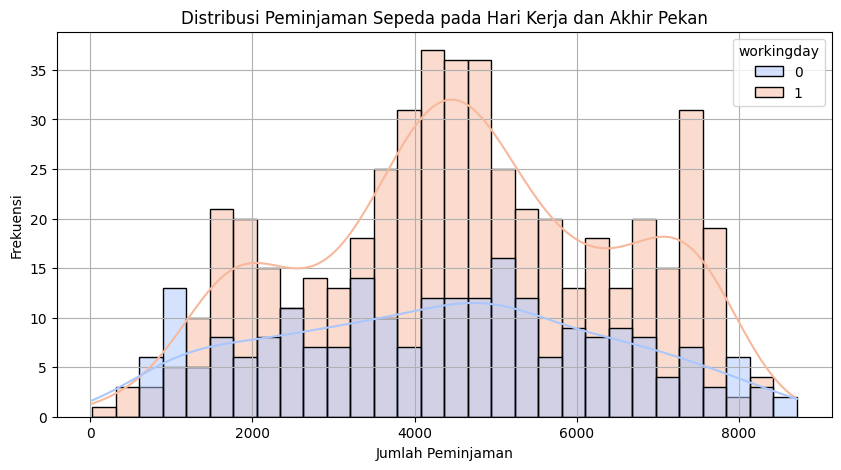

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=day_df, x='cnt', hue='workingday', kde=True, bins=30, palette='coolwarm')
plt.title('Distribusi Peminjaman Sepeda pada Hari Kerja dan Akhir Pekan')
plt.xlabel('Jumlah Peminjaman')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()
# if day is neither weekend nor holiday is 1, otherwise is 0.

**Insight:**
1. Pengaruh Cuaca terhadap Peminjaman Sepeda
Dari visualisasi diagram batang menunjukkan bahwa cuaca buruk, seperti hujan atau suhu ekstrem, berhubungan dengan penurunan jumlah peminjaman sepeda. Kondisi cuaca yang tidak mendukung kemungkinan besar mengurangi minat pengguna untuk bersepeda, sehingga menyebabkan penurunan signifikan dalam angka peminjaman.

2. Perbedaan Peminjaman Berdasarkan Hari
Dari visualisasi histogram mengindikasikan bahwa jumlah peminjaman sepeda cenderung lebih tinggi pada akhir pekan (weekend) atau hari libur dibandingkan dengan hari kerja. Hal ini dapat disebabkan oleh meningkatnya aktivitas rekreasi serta ketersediaan waktu luang yang lebih banyak di luar hari kerja.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclusion Pertanyaan 1
1. Pengaruh Cuaca terhadap Peminjaman Sepeda
Hasil analisis menunjukkan bahwa kondisi cuaca memiliki pengaruh signifikan terhadap jumlah peminjaman sepeda. Cuaca yang buruk, seperti hujan atau suhu ekstrem, cenderung menyebabkan penurunan jumlah peminjaman, sementara cuaca yang lebih baik mendukung peningkatan aktivitas bersepeda.

- Conclusion Pertanyaan 2
2. Pola Peminjaman pada Hari Kerja dan Akhir Pekan
Data menunjukkan bahwa jumlah peminjaman sepeda cenderung lebih tinggi pada hari kerja dibandingkan akhir pekan. Hal ini kemungkinan disebabkan oleh penggunaan sepeda sebagai moda transportasi utama untuk keperluan bekerja atau sekolah, sedangkan pada akhir pekan peminjaman lebih bersifat rekreasional dengan pola yang lebih bervariasi.